In [89]:
import numpy as np
import gudhi as gd
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from bisect import bisect_left, bisect_right
import matplotlib.pyplot as plt

In [84]:
def build_filtration(num_vertices, dist_mat_e, dist_mat_f, filtration_values, use_G=False, G=nx.Graph()):
    filtration = []
    
    num_filtrations = len(filtration_values)-1
    e_filtrations = [v[0] for v in filtration_values]
    f_filtrations = [v[1] for v in filtration_values]
    
    temp_G = nx.Graph()
    
    for i in range(num_vertices):
        for j in range(num_vertices - i - 1):
            j = j + i + 1
            filtration_step_e = bisect_right(e_filtrations, dist_mat_e[i][j])-1
            if (not use_G or (use_G and G.has_edge(i,j))) and filtration_step_e < num_filtrations:
                filtration.append(([i,j], filtration_step_e))
                temp_G.add_edge(i,j)
    for i in range(num_vertices):
        for j in range(num_vertices - i - 1):
            j = j + i + 1
            for k in range(num_vertices - j - 1):
                k = k + j + 1
                temp_G_has_triangle = temp_G.has_edge(i,j) and temp_G.has_edge(j,k) and temp_G.has_edge(i,k)
                if temp_G_has_triangle:
                    face_distance = max(dist_mat_f[i][j], dist_mat_f[i][k], dist_mat_f[j][k])
                    filtration_step_f = bisect_right(f_filtrations, face_distance)-1
                    G_has_triangle = G.has_edge(i,j) and G.has_edge(j,k) and G.has_edge(i,k)
                    if (not use_G or (use_G and G_has_triangle)) and filtration_step_e < num_filtrations:
                        filtration.append(([i,j,k], filtration_step_f))
    return filtration
    

In [85]:
## Test case: randomly sampled circle with 3 points
num_pts = 3
theta = np.linspace(0,2*np.pi, num_pts)
r = np.random.rand(num_pts)
x, y = r * np.cos(theta), r * np.sin(theta)
pt_cloud = np.asarray(list(zip(x,y)))

dist_e = squareform(pdist(pt_cloud))
dist_f = squareform(pdist(pt_cloud))

filtration_values = [(0,0), (.1, .2), (.4,.3), (.5,.8), (1,1)]

filtration = build_filtration(num_pts, dist_e, dist_f, filtration_values)

/Users/michellefeng/anaconda/envs/vrdi2019/lib/python3.7/site-packages/ipykernel/__main__.py:14: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
/Users/michellefeng/anaconda/envs/vrdi2019/lib/python3.7/site-packages/ipykernel/__main__.py:14: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.


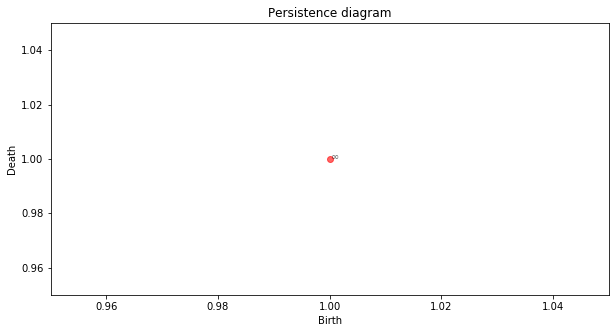

In [91]:
#Computer Persistence

sp_cpx = gd.SimplexTree()

for f in filtration:
    sp_cpx.insert(f[0],f[1])

sp_cpx.make_filtration_non_decreasing()

#BarCodes = spCpx.persistence()
Barcodes = sp_cpx.persistence()

fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,1,1)
gd.plot_persistence_diagram(sp_cpx.persistence())
plt.show()